<a href="https://colab.research.google.com/github/gr-uzun/melbourne-housing/blob/main/melbourne_housing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Required Libraries**

* Import the required libraries for the project to the Colab environment.
* Import NumPy, Pandas, Seaborn, and Matplotlib libraries for data analysis
* Import sklearn.model_selection, sklearn.metrics, sklearn.ensemble, sklearn.linear_model, sklearn_tree, sklearn.neighbour libraries and modules for modellling and evaluating performance of the model

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate,RepeatedKFold,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge,LogisticRegression,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

**Gathering and Observing Data**

* Load the dataset to the project with the help of read_csv() and observe the first 5 columns

* Find the shape, number of columns and size of the dataset

* Show the information of the dataset, which contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [2]:
# Load the dataset to the project with the help of read_csv() and observe the first 5 columns

df = pd.read_csv("/content/dataset/Melbourne_housing_FULL.csv")
df_copy = df.copy()

df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
# Find the shape, number of columns and size of the dataset

print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n'
      f'Dimension : {df_copy.ndim}')

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


In [4]:
"""
  Show the information of the dataset, which contains
  the number of columns, column labels, column data types, memory usage, range index,
  and the number of cells in each column (non-null values).
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

**Exploratory Data Analysis**

* Examine the descriptive statistics of dataset
The values of some variables are given as objects. At the same time, we observe that there are also categorical values. This might give us trouble when examining the dataset. Therefore, in such cases, we need to define the variables categorically.

* Check for duplicate data. If there are duplicate data, clear them from the dataset.

* Clear outlier data in the dataset. When you examine the dataset, you will observe that the outlier data is generally in the "Landsize" and "Buildingarea" variables.

 * We expect you to use the z-score method when detecting outliers in the dataset!

* Find and remove the missing values on the dataset

* You can observe from the dataset that the missing values are in the bathroom and car variables. We expect the missing values in the dataset to be filled using the mode method. You can use the code below for this.

In [5]:
"""
  Examine the descriptive statistics of dataset The values of some variables are given as objects.
  At the same time, we observe that there are also categorical values.
  This might give us trouble when examining the dataset.
  Therefore, in such cases, we need to define the variables categorically.
"""
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [6]:
# Check for duplicate data.
df_copy.duplicated().sum()

1

In [7]:
df_copy.loc[df_copy.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [8]:
# If there are duplicate data, clear them from the dataset.
df_copy.drop_duplicates(inplace=True)

print(df_copy.duplicated().sum())

0


**Outlier Detection and Handling**
- Clear outlier data in the dataset.
- When you examine the dataset, you will observe that the outlier data is generally in the "Landsize" and "Buildingarea" variables.
- We expect you to use the z-score method when detecting outliers in the dataset!

In [9]:
def outlier_thresholds(df, col_name, low_quantile=0.25, up_quantile=0.75):
    Q1 = df[col_name].quantile(low_quantile)
    Q3 = df[col_name].quantile(up_quantile)
    IQR = Q3 - Q1
    low_limit = Q1 - 50 * IQR
    up_limit = Q3 + 50 * IQR
    return low_limit, up_limit

In [10]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [11]:
num_cols = df_copy.select_dtypes(exclude='object').columns
obj_cols = df_copy.select_dtypes(include='object').columns

In [12]:
print(f'Numerical Columns : {num_cols}', end='\n\n')
print(f'Object Columns : {obj_cols}')

Numerical Columns : Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

Object Columns : Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [13]:
# When you examine the dataset, you will observe that the outlier data is generally in the "Landsize" and "BuildingArea" variables.
for col in num_cols:
    print(col, check_outlier(df_copy, col))

Rooms False
Price False
Distance False
Postcode False
Bedroom2 False
Bathroom False
Car False
Landsize True
BuildingArea True
YearBuilt False
Lattitude False
Longtitude False
Propertycount False


In [14]:
def plot_outliers(data_frame,cols_outlier):
  plt.figure(figsize=(12, 10))

  i = 0
  for col in cols_outlier:

    i = i+1
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, data=df_copy)
    plt.title(col + " Boxplot");

    i = i+1
    plt.subplot(2, 2, i)
    sns.violinplot(y=col, data=df_copy, inner="quartile", bw=0.2)
    plt.title(col + " Violin");

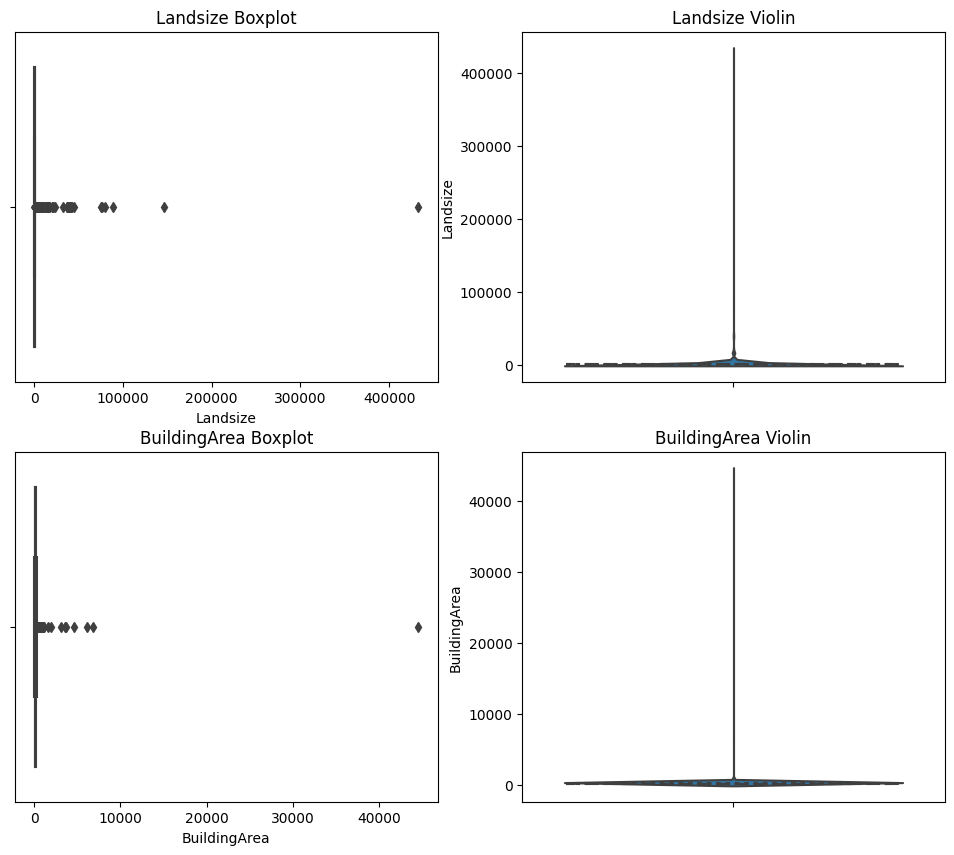

In [15]:
cols_outlier = ['Landsize','BuildingArea']
plot_outliers(df,cols_outlier)

In [16]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable , up_quantile=0.50)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [17]:
for col in cols_outlier:
    print(col, replace_with_thresholds(df_copy, col))

Landsize None
BuildingArea None


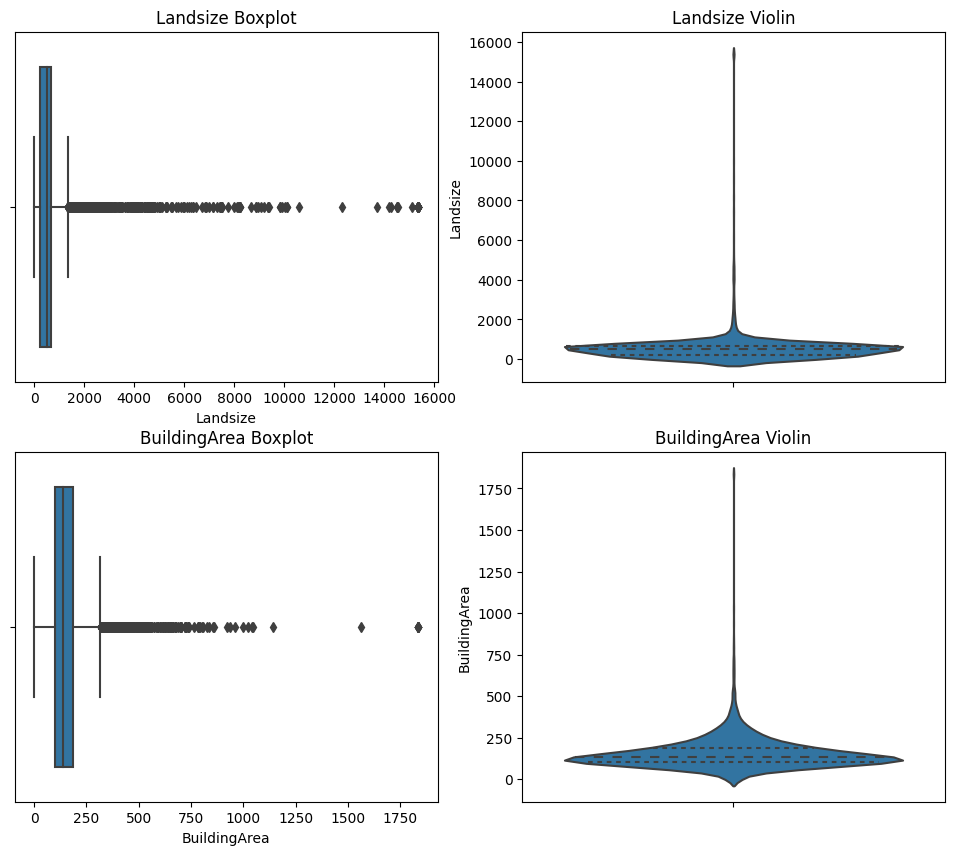

In [18]:
plot_outliers(df_copy,cols_outlier)

In [19]:
# Find and remove the missing values on the dataset
# You can observe from the dataset that the missing values are in the bathroom and car variables.
# We expect the missing values in the dataset to be filled using the mode method. You can use the code below for this.
"""
  HINT:
    for column in categorical_columns:
      data[column] = data[column].fillna(data[column].mode().iloc[0])
"""

print(pd.concat([df_copy.isnull().sum(), df_copy.isnull().sum()/len(df_copy)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

               Number of Missing Values  Ratio of Missing Values
Suburb                                0                 0.000000
Address                               0                 0.000000
Rooms                                 0                 0.000000
Type                                  0                 0.000000
Price                              7609                21.829814
Method                                0                 0.000000
SellerG                               0                 0.000000
Date                                  0                 0.000000
Distance                              1                 0.002869
Postcode                              1                 0.002869
Bedroom2                           8217                23.574134
Bathroom                           8226                23.599954
Car                                8728                25.040165
Landsize                          11810                33.882258
BuildingArea             

In [20]:
categorical_missing_columns = ['Bedroom2','Bathroom','Car', 'YearBuilt']
cols_drop_with_missing_values = ['Price','Distance', 'Postcode','CouncilArea','Lattitude','Longtitude', 'Regionname',  'Propertycount', 'Distance']
cols_fill_with_mean_value = ['Landsize','BuildingArea']

In [21]:
# the missing values in the dataset to be filled using the mode method
for col in categorical_missing_columns:
  df_copy[col] = df_copy[col].fillna(df_copy[col].mode().iloc[0])

In [22]:
# Drop rows with missing values
df_copy.dropna(subset=cols_drop_with_missing_values, inplace=True)

In [23]:
# Fill missing column value with mean value
for col in cols_fill_with_mean_value:
  mean =  df_copy[col].mean()
  df_copy[col] = df_copy[col].fillna(mean)

In [24]:
print(pd.concat([df_copy.isnull().sum(), df_copy.isnull().sum()/len(df_copy)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

               Number of Missing Values  Ratio of Missing Values
Suburb                                0                      0.0
Address                               0                      0.0
Rooms                                 0                      0.0
Type                                  0                      0.0
Price                                 0                      0.0
Method                                0                      0.0
SellerG                               0                      0.0
Date                                  0                      0.0
Distance                              0                      0.0
Postcode                              0                      0.0
Bedroom2                              0                      0.0
Bathroom                              0                      0.0
Car                                   0                      0.0
Landsize                              0                      0.0
BuildingArea             

In [25]:
# Find the shape, number of columns and size of the dataset
print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n'
      f'Dimension : {df_copy.ndim}')

Shape     : (20993, 21)
Size      : 440853
Dimension : 2


**Data Visualization:**
- Build a Histogram to visualize price distribution
- Draw a pair plot to see the relationship between all numerical variables and
the price variable.
- Draw a correlation matrix by using a heatmap on seaborn
- Implement Label Encoder and One Hot encoder for categorical variables

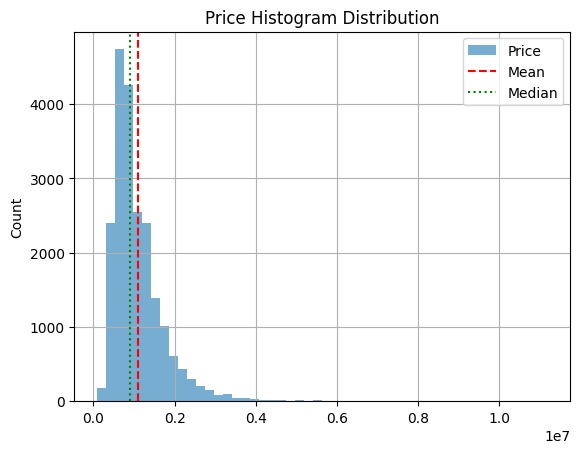

In [26]:
# Build a Histogram to visualize price distribution
df_copy['Price'].hist(bins=50, label='Price', alpha=0.6)
plt.axvline(np.mean(df_copy['Price']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df_copy['Price']), ls=':', c='g', label="Median")
plt.ylabel("Count")
plt.title("Price Histogram Distribution");
plt.legend()

# Show plot
plt.show()

In [27]:
def plot_relationship_with_price(data_frame,cols):
  plt.figure(figsize=(12, 10))

  i = 0
  for col in cols:

    i = i+1
    plt.subplot(2, 2, i)
    sns.violinplot(x= col, y='Price', data=df_copy)
    plt.title('Violin plot of Price vs ' + col);

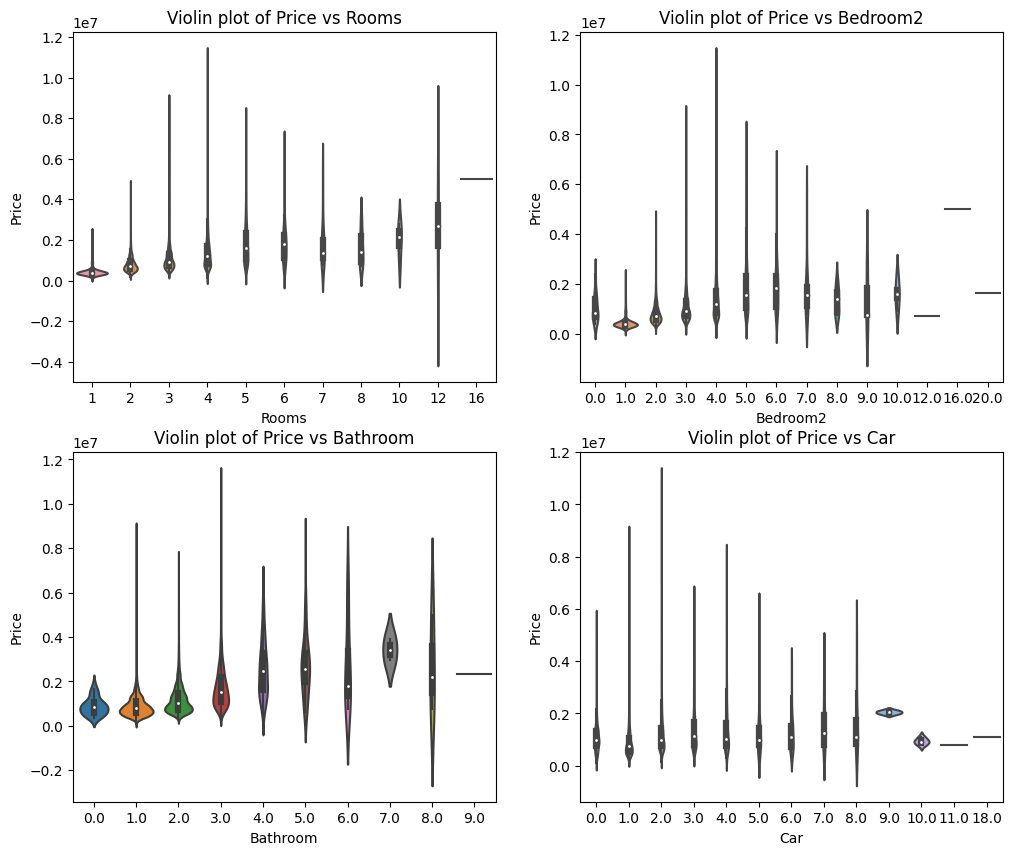

In [28]:
# Draw a pair plot to see the relationship between all numerical variables and the price variable.
num_cols_except_price = ['Rooms',   'Bedroom2', 'Bathroom', 'Car']

plot_relationship_with_price(df_copy,num_cols_except_price)

<ipython-input-29-90f6ba7ba7d7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_copy.corr()


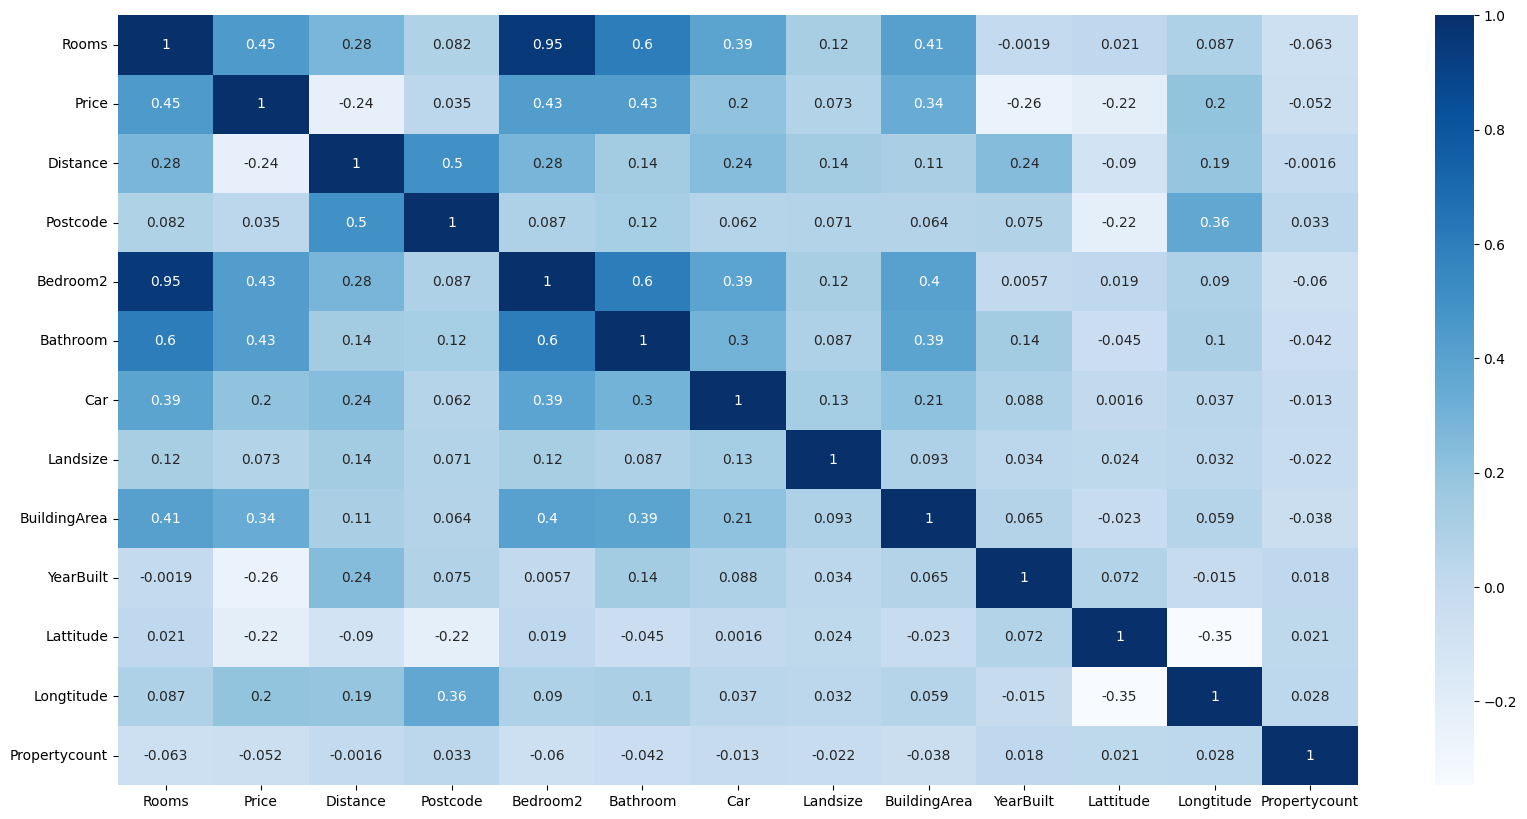

In [29]:
# Draw a correlation matrix by using a heatmap on seaborn
corr = df_copy.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True);

**Implement Label Encoder and One Hot encoder for categorical variables**

In [30]:
# Label Encoding

df_le = df_copy.copy()

def label_encoding(column_name):
  label_encoder = LabelEncoder()
  # le.fit(df_le[column_name].drop_duplicates())
  df_le[column_name] = label_encoder.fit_transform(df_copy[column_name])

In [31]:
# Label Encoding

# Comments
# For a start, we will encode categorical features.
# Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

for col in obj_cols:
  label_encoding(col)


print('\nNumber of rows and columns in the data set: ',df_le.shape)
print('')

df_le.head()


Number of rows and columns in the data set:  (20993, 21)



,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,0,19696,2,0,1480000.0,1,27,60,2.5,3067.0,...,1.0,1.0,202.0,151.698821,1970.0,31,-37.7996,144.9984,2,4019.0
2,0,9075,2,0,1035000.0,1,27,63,2.5,3067.0,...,1.0,0.0,156.0,79.000000,1900.0,31,-37.8079,144.9934,2,4019.0
4,0,15094,3,0,1465000.0,3,27,64,2.5,3067.0,...,2.0,0.0,134.0,150.000000,1900.0,31,-37.8093,144.9944,2,4019.0
5,0,13828,3,0,850000.0,0,27,64,2.5,3067.0,...,2.0,1.0,94.0,151.698821,1970.0,31,-37.7969,144.9969,2,4019.0
6,0,16290,4,0,1600000.0,4,192,65,2.5,3067.0,...,1.0,2.0,120.0,142.000000,2014.0,31,-37.8072,144.9941,2,4019.0


In [32]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20993 entries, 1 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         20993 non-null  int64  
 1   Address        20993 non-null  int64  
 2   Rooms          20993 non-null  int64  
 3   Type           20993 non-null  int64  
 4   Price          20993 non-null  float64
 5   Method         20993 non-null  int64  
 6   SellerG        20993 non-null  int64  
 7   Date           20993 non-null  int64  
 8   Distance       20993 non-null  float64
 9   Postcode       20993 non-null  float64
 10  Bedroom2       20993 non-null  float64
 11  Bathroom       20993 non-null  float64
 12  Car            20993 non-null  float64
 13  Landsize       20993 non-null  float64
 14  BuildingArea   20993 non-null  float64
 15  YearBuilt      20993 non-null  float64
 16  CouncilArea    20993 non-null  int64  
 17  Lattitude      20993 non-null  float64
 18  Longti

In [33]:
# one-hot encoding

categorical_columns = ['Type','Method']

one_hot = pd.get_dummies(df_copy[categorical_columns])
one_hot.head()

,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
1,1,0,0,0,1,0,0,0
2,1,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0
5,1,0,0,1,0,0,0,0
6,1,0,0,0,0,0,0,1


In [34]:
one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20993 entries, 1 to 34856
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Type_h     20993 non-null  uint8
 1   Type_t     20993 non-null  uint8
 2   Type_u     20993 non-null  uint8
 3   Method_PI  20993 non-null  uint8
 4   Method_S   20993 non-null  uint8
 5   Method_SA  20993 non-null  uint8
 6   Method_SP  20993 non-null  uint8
 7   Method_VB  20993 non-null  uint8
dtypes: uint8(8)
memory usage: 328.0 KB


In [35]:
# Create new data frame , add new columns and drop old categorial columns
# Concenates label and one-hot encoding dataframes

df_le.reset_index(drop=True, inplace=True)
one_hot.reset_index(drop=True, inplace=True)

df_new = pd.concat([df_le, one_hot], axis="columns")
df_new.drop(categorical_columns, axis=1, inplace=True)
df_new.head()

,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,...,Regionname,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
0,0,19696,2,1480000.0,27,60,2.5,3067.0,2.0,1.0,...,2,4019.0,1,0,0,0,1,0,0,0
1,0,9075,2,1035000.0,27,63,2.5,3067.0,2.0,1.0,...,2,4019.0,1,0,0,0,1,0,0,0
2,0,15094,3,1465000.0,27,64,2.5,3067.0,3.0,2.0,...,2,4019.0,1,0,0,0,0,0,1,0
3,0,13828,3,850000.0,27,64,2.5,3067.0,3.0,2.0,...,2,4019.0,1,0,0,1,0,0,0,0
4,0,16290,4,1600000.0,192,65,2.5,3067.0,3.0,1.0,...,2,4019.0,1,0,0,0,0,0,0,1


In [36]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20993 entries, 0 to 20992
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         20993 non-null  int64  
 1   Address        20993 non-null  int64  
 2   Rooms          20993 non-null  int64  
 3   Price          20993 non-null  float64
 4   SellerG        20993 non-null  int64  
 5   Date           20993 non-null  int64  
 6   Distance       20993 non-null  float64
 7   Postcode       20993 non-null  float64
 8   Bedroom2       20993 non-null  float64
 9   Bathroom       20993 non-null  float64
 10  Car            20993 non-null  float64
 11  Landsize       20993 non-null  float64
 12  BuildingArea   20993 non-null  float64
 13  YearBuilt      20993 non-null  float64
 14  CouncilArea    20993 non-null  int64  
 15  Lattitude      20993 non-null  float64
 16  Longtitude     20993 non-null  float64
 17  Regionname     20993 non-null  int64  
 18  Proper

In [37]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Suburb,20993.0,1.669836e+02,97.151325,0.00000,81.0000,166.000000,2.520000e+02,3.370000e+02
Address,20993.0,1.030422e+04,5947.119142,0.00000,5156.0000,10294.000000,1.545100e+04,2.061200e+04
Rooms,20993.0,3.059163e+00,0.949881,1.00000,2.0000,3.000000,4.000000e+00,1.600000e+01
Price,20993.0,1.089746e+06,653028.263712,85000.00000,657000.0000,910000.000000,1.335000e+06,1.120000e+07
SellerG,20993.0,1.578835e+02,93.732374,0.00000,88.0000,166.000000,2.360000e+02,3.230000e+02
Date,20993.0,3.930296e+01,21.945385,0.00000,21.0000,39.000000,5.700000e+01,7.700000e+01
Distance,20993.0,1.135902e+01,6.891418,0.00000,6.4000,10.400000,1.420000e+01,4.810000e+01
Postcode,20993.0,3.114631e+03,114.810599,3000.00000,3046.0000,3087.000000,3.152000e+03,3.978000e+03
Bedroom2,20993.0,3.045777e+00,0.950194,0.00000,2.0000,3.000000,4.000000e+00,2.000000e+01
Bathroom,20993.0,1.585243e+00,0.699783,0.00000,1.0000,1.000000,2.000000e+00,9.000000e+00


In [38]:
print(pd.concat([df_new.isnull().sum(), df_new.isnull().sum()/len(df_new)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

               Number of Missing Values  Ratio of Missing Values
Suburb                                0                      0.0
Address                               0                      0.0
Rooms                                 0                      0.0
Price                                 0                      0.0
SellerG                               0                      0.0
Date                                  0                      0.0
Distance                              0                      0.0
Postcode                              0                      0.0
Bedroom2                              0                      0.0
Bathroom                              0                      0.0
Car                                   0                      0.0
Landsize                              0                      0.0
BuildingArea                          0                      0.0
YearBuilt                             0                      0.0
CouncilArea              

**Model Selection**

- Since we are going to make a price estimation, we need to determine our x and y
variables correctly.
- Splitting our data into train-test in order to increase the performance of model training
- Train your models using preprocessed data with the models mentioned below

In [39]:
# we need to determine our x and y variables correctly.
X = df_new.drop("Price", axis=1)
y = df_new["Price"]

In [40]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y[0:5]

0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

In [41]:
# Split your dataset into X_train,X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [42]:
X_train.shape

(16794, 26)

In [43]:
X_test.shape

(4199, 26)

In [44]:
y_train.shape

(16794,)

In [45]:
y_test.shape

(4199,)

In [46]:
# Creating models

models_dict = {
  'Lasso': {
    'model': Lasso()
  },
  'LinearRegression': {
    'model': LinearRegression()
  },
  'Ridge': {
    'model': Ridge()
  },
  'ElasticNet': {
    'model': ElasticNet()
  },
  'KNeighborsRegressor': {
    'model': KNeighborsRegressor()
  },
  'RandomForestRegressor': {
    'model': RandomForestRegressor()
  },
  'GradientBoostingRegressor': {
    'model': GradientBoostingRegressor()
  },
  'AdaBoostRegressor': {
    'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
  }
}

In [47]:
# Trainning models
for key, item in models_dict.items():
  model = item.get('model')

  model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.995e+14, tolerance: 7.163e+11
  model = cd_fast.enet_coordinate_descent(


**Model Evaluation**
- Comparing models in each other
- Choose the best performing model by using evaluation metrics(MAE, MSE, RMSE,
R2)

In [48]:
# Evaluate the optimized model using regression model evaluation metrics.
# (Ex. Mean Squared Error, Mean Absolute Error etc.)

def regression_evaluation(key,preds):
  r_squared = r2_score(y_test, preds)
  mae = mean_absolute_error(y_test, preds)
  mse = mean_squared_error(y_test, preds)
  rmse = np.sqrt(mse)

  print("*** Model: ", key , ' ***')
  print("R2 Score:", r_squared)
  print('Mean Absolute Error:', mae)
  print('Mean Squared Error:', mse)
  print('Root Mean Squared Error:', rmse)

  print()

In [49]:
# Make predictions using the test dataset
for key, item in models_dict.items():

  model = item.get('model')

  y_preds = model.predict(X_test)

  item.update({"y_preds": y_preds})


In [50]:
# Make evaluation
for key, item in models_dict.items():

  model = item.get('model')

  y_preds = item.get('y_preds')

  regression_evaluation(key,y_preds)

*** Model:  Lasso  ***
R2 Score: 0.5834607140547983
Mean Absolute Error: 277121.3402348385
Mean Squared Error: 177493327516.2651
Root Mean Squared Error: 421299.5698030857

*** Model:  LinearRegression  ***
R2 Score: 0.5835778964270895
Mean Absolute Error: 276975.8261490831
Mean Squared Error: 177443394436.995
Root Mean Squared Error: 421240.30485815933

*** Model:  Ridge  ***
R2 Score: 0.5832332587665163
Mean Absolute Error: 276904.2166255218
Mean Squared Error: 177590249456.98126
Root Mean Squared Error: 421414.5814479861

*** Model:  ElasticNet  ***
R2 Score: 0.10848835273473922
Mean Absolute Error: 435412.28922409716
Mean Squared Error: 379885821414.29755
Root Mean Squared Error: 616348.782276965

*** Model:  KNeighborsRegressor  ***
R2 Score: 0.5501059742733475
Mean Absolute Error: 272030.3165039295
Mean Squared Error: 191706257609.5569
Root Mean Squared Error: 437842.7315938417

*** Model:  RandomForestRegressor  ***
R2 Score: 0.8034593766488091
Mean Absolute Error: 166350.267261

In [51]:
# RandomForestRegressor has max R2 Score

comparison = pd.DataFrame({"Y Test": y_test[0:10].values,
                         "Predictions": models_dict["RandomForestRegressor"]["y_preds"][0:10]})
comparison

,Y Test,Predictions
0,525000.0,534646.0
1,4500000.0,2741500.0
2,585000.0,656520.0
3,525500.0,618167.0
4,625000.0,558307.0
5,782000.0,819403.0
6,1170000.0,1167545.0
7,1250000.0,1072425.0
8,590000.0,766230.0
9,356000.0,392335.0
